In [28]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import pandas as pd

In [2]:
import os
# change python directory 
os.chdir('/home/jh8862/theory-lab/comp-lab-2023/Week3/Analysis')

In [3]:
time, PE = np.loadtxt("../potential.xvg", unpack = True, comments = ["#", "@"])

In [4]:
step = np.arange(0, 847)

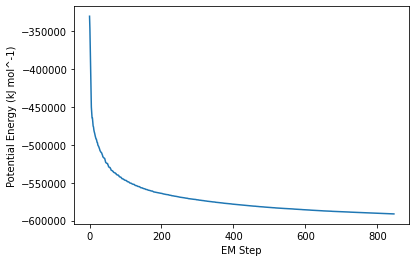

In [7]:
fig, ax = plt.subplots()
ax.plot(step, PE)

ax.set(xlabel='EM Step', ylabel="Potential Energy (kJ mol^-1)")
plt.savefig("EM_step_v_PE.png", dpi=300, bbox_inches="tight")
plt.show()

In [9]:
time, T = np.loadtxt("../temperature.xvg", unpack = True, comments = ["#", "@"])

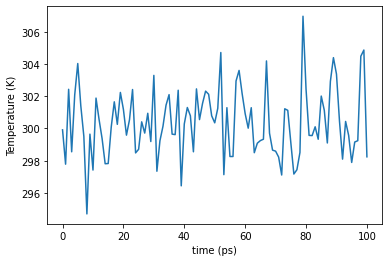

In [10]:
fig, ax = plt.subplots()
ax.plot(time, T)

ax.set(xlabel='time (ps)', ylabel="Temperature (K)")
plt.savefig("time_v_Temp.png", dpi=300, bbox_inches="tight")
plt.show()

In [11]:
time, p = np.loadtxt("../pressure.xvg", unpack = True, comments = ["#", "@"])

In [19]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

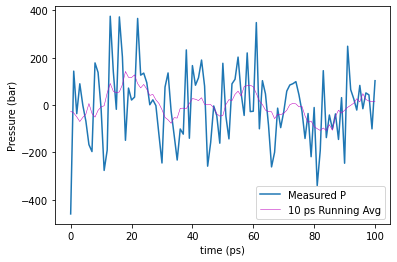

In [13]:
p_copy = p
avg_p = movingaverage(p_copy, 10)

fig, ax = plt.subplots()
ax.plot(time, p)
ax.plot(time, avg_p, color = "m", linewidth=0.5)

ax.set(xlabel='time (ps)', ylabel="Pressure (bar)")
ax.legend(["Measured P", "10 ps Running Avg"], loc =4)
plt.savefig("time_v_Pressure.png", dpi=300, bbox_inches="tight")
plt.show()

In [14]:
time, density = np.loadtxt("../density.xvg", unpack = True, comments = ["#", "@"])

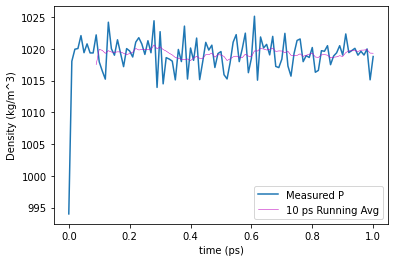

In [29]:
density = pd.Series(density)
avg_d = density.rolling(window=10).mean()
#d_copy = density
#avg_d = movingaverage(d_copy, 10)

fig, ax = plt.subplots()
ax.plot(time, density)
ax.plot(time, avg_d, color = "m", linewidth=0.5)

ax.set(xlabel='time (ps)', ylabel="Density (kg/m^3)")
ax.legend(["Measured P", "10 ps Running Avg"], loc =4)
plt.savefig("time_v_density.png", dpi=300, bbox_inches="tight")
plt.show()

In [24]:
time, rmsd = np.loadtxt("../rmsd.xvg", unpack = True, comments = ["#", "@"])

In [25]:
time, rmsd_xtal = np.loadtxt("../rmsd_xtal.xvg", unpack = True, comments = ["#", "@"])

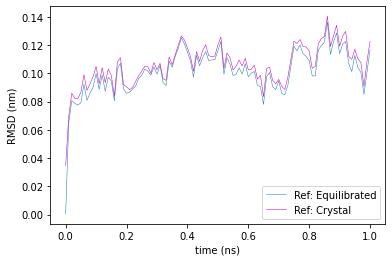

In [26]:
fig, ax = plt.subplots()
ax.plot(time, rmsd, linewidth=0.5)
ax.plot(time, rmsd_xtal, color = "m", linewidth=0.5)

ax.set(xlabel='time (ns)', ylabel="RMSD (nm)")
ax.legend(["Ref: Equilibrated", "Ref: Crystal"], loc =4)
plt.savefig("time_v_rmsd.png", dpi=300, bbox_inches="tight")
plt.show()

In [31]:
time, Rg, Rgx, Rgy, Rgz = np.loadtxt("../gyrate.xvg", unpack = True, comments = ["#", "@"])


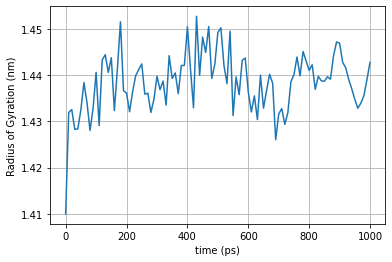

In [32]:
fig, ax = plt.subplots()
ax.plot(time, Rg)
    
ax.set(xlabel='time (ps)', ylabel='Radius of Gyration (nm)')
ax.grid()
plt.savefig("time_v_rg.png", dpi=300, bbox_inches="tight")
plt.show()